# Importing Required Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

# Reading the dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Preparing the data for regression

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print("The shape of X_train and y_train are {} and {}".format(X_train.shape, y_train.shape))
print("The shape of X_test and y_test are {} and {}".format(X_test.shape, y_test.shape))

The shape of X_train and y_train are (7654, 4) and (7654,)
The shape of X_test and y_test are (1914, 4) and (1914,)


In [5]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
X_train_stnd = scx.fit_transform(X_train)
y_train_stnd = scy.fit_transform(y_train.reshape(-1,1))
X_test_stnd = scx.transform(X_test)
y_test_stnd = scy.fit_transform(y_test.reshape(-1,1))

# Multiple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train,y_train)
y_pred_lr = regressor_lr.predict(X_test)

# Polynomial Linear Regression

## preparing the coefficient matrix

In [7]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 4)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
regressor_lr_poly = LinearRegression()
regressor_lr_poly.fit(X_train_poly, y_train)
y_pred_lr_poly = regressor_lr_poly.predict(X_test_poly)

# SVR

In [9]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = "rbf")
regressor_svr.fit(X_train_stnd,y_train_stnd.reshape(-1))
y_pred_svr = scy.inverse_transform(regressor_svr.predict(X_test_stnd))

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)
y_pred_dt = regressor_dt.predict(X_test)

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 10)
regressor_rf.fit(X_train, y_train)
y_pred_rf = regressor_rf.predict(X_test)

# Evaluating the models

In [12]:
from sklearn.metrics import r2_score
R2_lr = r2_score(y_test,y_pred_lr)
R2_lr_poly = r2_score(y_test,y_pred_lr_poly)
R2_svr = r2_score(y_test,y_pred_svr)
R2_dt = r2_score(y_test,y_pred_dt)
R2_rf = r2_score(y_test,y_pred_rf)

# Plotting the predictions

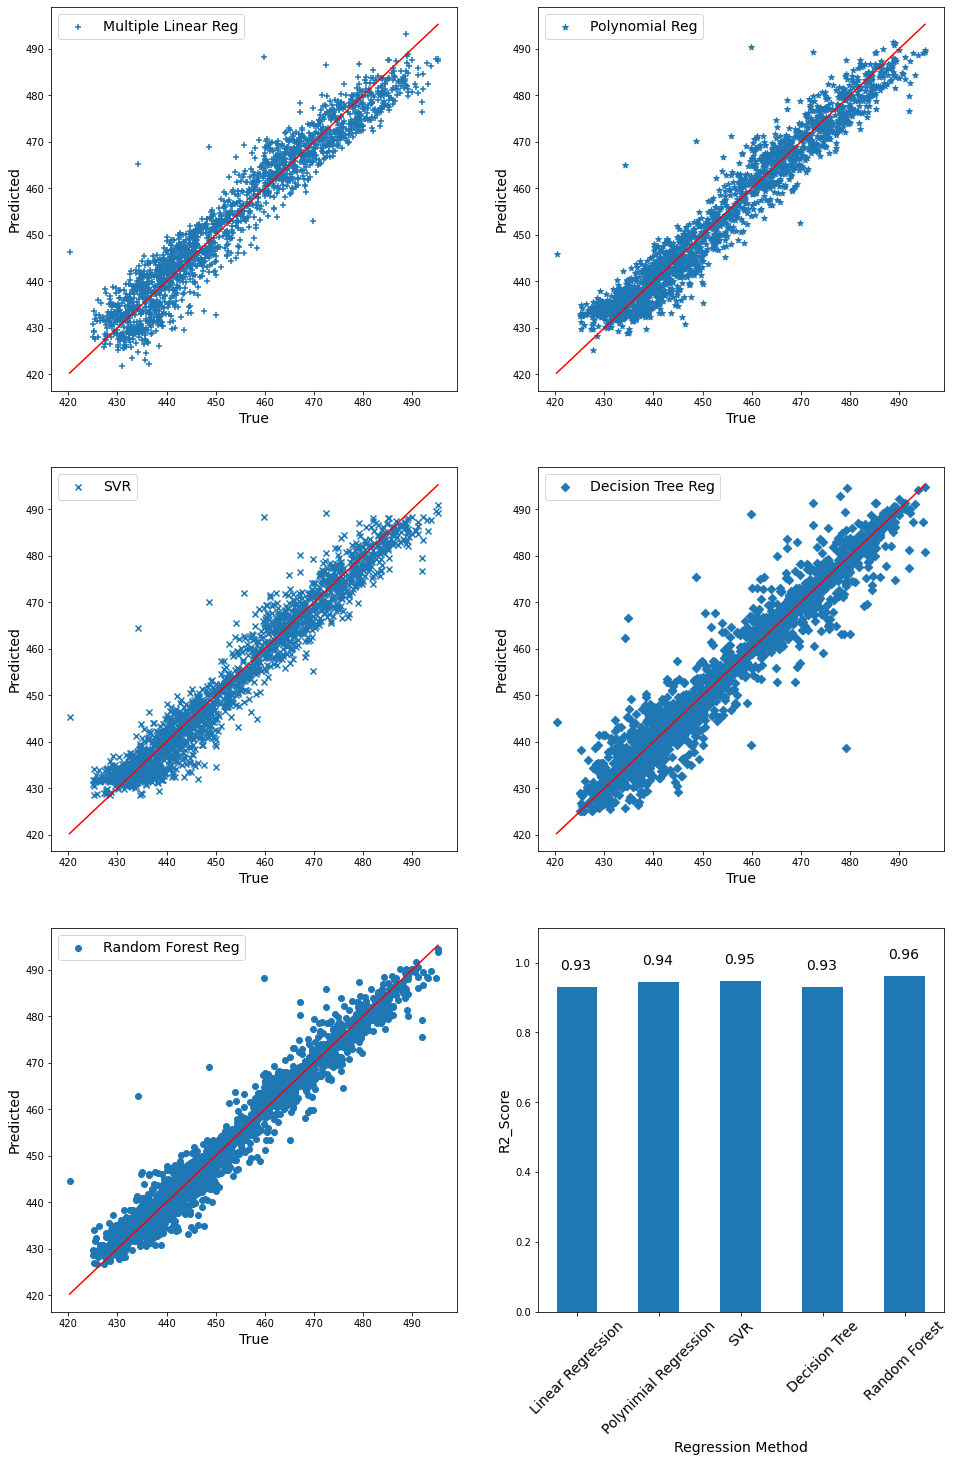

In [13]:
fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(nrows = 3, ncols = 2, figsize = [16,24])

ax1.scatter(y_test, y_pred_lr, label = "Multiple Linear Reg", marker = '+')
ax1.plot(np.arange(y_test.min(), y_test.max()),np.arange(y_test.min(), y_test.max()), color = "red")
ax1.legend(fontsize = 14)
ax1.set_xlabel("True", fontsize = 14)
ax1.set_ylabel("Predicted", fontsize = 14)

ax2.scatter(y_test, y_pred_lr_poly, label = "Polynomial Reg", marker = '*')
ax2.plot(np.arange(y_test.min(), y_test.max()),np.arange(y_test.min(), y_test.max()), color = "red")
ax2.legend(fontsize = 14)
ax2.set_xlabel("True", fontsize = 14)
ax2.set_ylabel("Predicted", fontsize = 14)

ax3.scatter(y_test, y_pred_svr, label = "SVR", marker = 'x')
ax3.plot(np.arange(y_test.min(), y_test.max()),np.arange(y_test.min(), y_test.max()), color = "red")
ax3.legend(fontsize = 14)
ax3.set_xlabel("True", fontsize = 14)
ax3.set_ylabel("Predicted", fontsize = 14)

ax4.scatter(y_test, y_pred_dt, label = "Decision Tree Reg", marker = 'D')
ax4.plot(np.arange(y_test.min(), y_test.max()),np.arange(y_test.min(), y_test.max()), color = "red")
ax4.legend(fontsize = 14)
ax4.set_xlabel("True", fontsize = 14)
ax4.set_ylabel("Predicted", fontsize = 14)

ax5.scatter(y_test, y_pred_rf, label = "Random Forest Reg")
ax5.plot(np.arange(y_test.min(), y_test.max()),np.arange(y_test.min(), y_test.max()), color = "red")
ax5.legend(fontsize = 14)
ax5.set_xlabel("True", fontsize = 14)
ax5.set_ylabel("Predicted", fontsize = 14)

R2 = [R2_lr, R2_lr_poly, R2_svr, R2_dt, R2_rf]
R2_list = ["Linear Regression", "Polynimial Regression", "SVR", "Decision Tree", "Random Forest"]
ax6.bar(np.arange(5), R2, width= 0.5)
ax6.set_xticks(np.arange(5))
ax6.set_xticklabels(R2_list, rotation=45, fontsize = 14)
ax6.set_ylim(0,1.1)
ax6.set_ylabel("R2_Score", fontsize = 14)
ax6.set_xlabel("Regression Method", fontsize = 14)
for i,r in enumerate(R2):
    ax6.annotate(str(np.round(r,2)),(i-0.2,r+0.05), fontsize = 14)


# As can be seen, The best regressor among the above 5 methods is Random Forest with the R2_score of 0.96